<a href="https://colab.research.google.com/github/vsheva69/Computer-Vision_Roboflow_UltralyticsYolo/blob/main/computer_vision_roboflow_ultralyticsyolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Fri Mar  7 01:17:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [ ]:
!pip install ultralytics==8.2.103 -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image ,Video

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("deteksi-jalan-berlubang-mxoyj").project("lubang-project")
version = project.version(4)
dataset = version.download("yolov8-obb")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
data['train'] = '../train/images'
data['val'] = '../valid/images'
data['test'] = '../test/images'
if 'path' in data:
  del data['path']
with open(f'{dataset.location}/data.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)

## Train a YOLOv8 OBB Object Detection Model

With our dataset downloaded, we can now train a YOLOv8 OBB object detection model. Run the code snippet below to start training your model:

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=300, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.85 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/datasets/lubang-project-4/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning /content/datasets/lubang-project-4/train/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/datasets/lubang-project-4/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]


Plotting labels to runs/obb/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train3
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      1.77G      2.386      3.103      3.154         96        640: 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all          2         19     0.0283      0.895      0.051     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      1.69G      2.244      3.156      3.011        116        640: 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          2         19     0.0283      0.895       0.05     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      1.72G      2.596      3.094      3.115        141        640: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all          2         19     0.0283      0.895     0.0495     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      1.78G       2.45      3.028      3.182        119        640: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          2         19     0.0283      0.895     0.0527     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300       1.8G      2.371      3.137      2.838        147        640: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all          2         19     0.0283      0.895      0.048     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      1.74G      2.466      3.122      3.024        126        640: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all          2         19     0.0283      0.895     0.0516     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      1.67G      2.173      2.973      2.945         96        640: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all          2         19     0.0267      0.842     0.0558     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300       1.7G      2.301      2.981      3.028        130        640: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]

                   all          2         19     0.0267      0.842     0.0712     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      1.68G      2.141      2.687      2.944        115        640: 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          2         19     0.0267      0.842      0.119       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      1.68G      1.991      2.577      2.606        120        640: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]

                   all          2         19      0.138      0.632      0.294      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      1.68G      1.859      2.478       2.41        124        640: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all          2         19      0.554      0.263      0.438      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      1.66G       1.75      2.208       2.67        100        640: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.31it/s]

                   all          2         19      0.561      0.263      0.461      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300       1.7G      1.786      2.057      2.432        128        640: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

                   all          2         19       0.55      0.526      0.518      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      1.68G      1.703      2.114      2.574         95        640: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all          2         19      0.487      0.579      0.537      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      1.68G      1.709      2.061      2.643        101        640: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all          2         19      0.499      0.579      0.557       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      1.67G      1.489      1.822      2.374         99        640: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all          2         19      0.466      0.632      0.535      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      1.67G      1.539      1.763      2.638         75        640: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all          2         19      0.541      0.526      0.585      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      1.66G      1.585      1.632      2.284        164        640: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all          2         19      0.541      0.526      0.585      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      1.71G      1.469      1.621      2.292        110        640: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all          2         19      0.603      0.579      0.538      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300       1.7G      1.456       1.48      2.257        144        640: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all          2         19      0.603      0.579      0.538      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      1.67G      1.379      1.538      2.567         89        640: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all          2         19       0.62      0.515      0.518      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      1.68G      1.517      1.543      2.388        101        640: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          2         19       0.62      0.515      0.518      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      1.69G      1.412       1.53       2.32        120        640: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.17it/s]

                   all          2         19      0.618      0.474      0.494      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       1.7G      1.512      1.492      2.374        139        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          2         19      0.618      0.474      0.494      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      1.71G      1.317      1.361      2.481        113        640: 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all          2         19      0.605      0.526      0.499      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      1.68G      1.318      1.312      2.306        105        640: 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          2         19      0.605      0.526      0.499      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      1.71G      1.367      1.253       2.26        153        640: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          2         19       0.47      0.474      0.382      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      1.67G      1.249      1.161      2.238        126        640: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          2         19       0.47      0.474      0.382      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      1.71G      1.358      1.311      2.206        178        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all          2         19      0.417      0.474        0.3     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      1.67G      1.136      1.159      2.021        118        640: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all          2         19      0.417      0.474        0.3     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      1.68G      1.282      1.163      2.221        179        640: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]

                   all          2         19      0.388      0.474      0.268      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      1.68G      1.195      1.122      2.362        121        640: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all          2         19      0.388      0.474      0.268      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      1.71G      1.263      1.109      2.328        141        640: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all          2         19      0.338      0.474      0.233     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      1.67G      1.214      1.269      2.542         88        640: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all          2         19      0.338      0.474      0.233     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      1.71G      1.179      1.107      2.072        146        640: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.22it/s]

                   all          2         19      0.316      0.474      0.206     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      1.68G      1.207      1.059        2.3        112        640: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

                   all          2         19      0.316      0.474      0.206     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      1.69G      1.203      1.053      2.266        133        640: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.50it/s]

                   all          2         19       0.24      0.211      0.103     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      1.68G      1.173      1.013      2.116        113        640: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          2         19       0.24      0.211      0.103     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      1.68G      1.239      1.117      2.051        174        640: 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]

                   all          2         19      0.195      0.211     0.0757     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      1.68G      1.079      1.034       2.39         93        640: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all          2         19      0.195      0.211     0.0757     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      1.69G      1.049     0.9797      2.079        105        640: 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all          2         19      0.307      0.316      0.147     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      1.68G       1.05     0.9223      2.104        108        640: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.30it/s]

                   all          2         19      0.307      0.316      0.147     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      1.71G      1.215      1.069      2.172        161        640: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]

                   all          2         19      0.323      0.211      0.108      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      1.66G      1.062     0.9762      2.024        113        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]

                   all          2         19      0.323      0.211      0.108      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      1.71G      1.103     0.9663      2.239        116        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          2         19      0.282      0.263      0.136     0.0416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      1.68G      1.035     0.9028       2.33         95        640: 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          2         19      0.282      0.263      0.136     0.0416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      1.66G      1.055       0.88      1.993        153        640: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.40it/s]

                   all          2         19      0.304      0.316      0.198     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300       1.7G      1.187     0.9387      2.189        120        640: 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all          2         19      0.304      0.316      0.198     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      1.69G      1.015     0.8411      2.078        109        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

                   all          2         19      0.343      0.316      0.251     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      1.68G      1.026     0.8187      1.958        137        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.06it/s]

                   all          2         19      0.343      0.316      0.251     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      1.71G      1.061     0.8794      1.945        117        640: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all          2         19      0.228      0.263      0.186     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      1.65G      0.973     0.8768      1.839        156        640: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]

                   all          2         19      0.228      0.263      0.186     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      1.67G       1.05     0.8808      2.104        185        640: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          2         19      0.228      0.263      0.186     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      1.68G     0.9613     0.8581      1.991        105        640: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.33it/s]

                   all          2         19      0.559      0.368      0.308      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      1.67G     0.8938      0.755      2.098        112        640: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]

                   all          2         19      0.559      0.368      0.308      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      1.69G      1.018     0.8911      2.036        117        640: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all          2         19      0.559      0.368      0.308      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      1.66G     0.9461     0.7658      1.948        143        640: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all          2         19      0.472      0.368      0.324      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      1.68G     0.8833     0.8078      2.016         89        640: 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

                   all          2         19      0.472      0.368      0.324      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      1.67G     0.9893      1.016      1.994         63        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]

                   all          2         19      0.472      0.368      0.324      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      1.68G     0.9481     0.8361      2.034        107        640: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all          2         19      0.458      0.445      0.364       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      1.67G     0.9269     0.8398      2.258         84        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all          2         19      0.458      0.445      0.364       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      1.71G       1.01     0.8986      1.837        108        640: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all          2         19      0.458      0.445      0.364       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      1.66G      1.023     0.8094      2.039        136        640: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all          2         19      0.455      0.579      0.506      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300       1.7G     0.9592     0.8131      1.974        118        640: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]

                   all          2         19      0.455      0.579      0.506      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      1.69G     0.8884     0.8105      1.882        105        640: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all          2         19      0.455      0.579      0.506      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      1.68G     0.9793     0.8366      2.148         89        640: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.57it/s]

                   all          2         19      0.702      0.526      0.562      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300       1.7G     0.9991     0.7875      1.851        149        640: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all          2         19      0.702      0.526      0.562      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      1.67G     0.8843     0.7928      2.158         81        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          2         19      0.702      0.526      0.562      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      1.71G     0.9165     0.7629      1.896        144        640: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.40it/s]

                   all          2         19      0.917      0.579      0.621      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      1.68G     0.9389     0.8138      2.065         95        640: 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all          2         19      0.917      0.579      0.621      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      1.68G     0.8312     0.7055      2.066         90        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          2         19      0.917      0.579      0.621      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      1.66G     0.9296     0.7442      1.997        165        640: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all          2         19      0.916      0.576      0.622      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300       1.7G       0.92     0.7176      2.056        120        640: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all          2         19      0.916      0.576      0.622      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      1.71G     0.8887     0.7482      1.965        142        640: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all          2         19      0.916      0.576      0.622      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      1.68G     0.8535     0.6928       1.81        127        640: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]

                   all          2         19      0.852      0.608      0.669      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      1.67G     0.8876     0.7661      2.026         78        640: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]

                   all          2         19      0.852      0.608      0.669      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      1.71G     0.8117     0.6719      1.935        127        640: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.05it/s]

                   all          2         19      0.852      0.608      0.669      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      1.68G      0.907     0.7375      2.081        123        640: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          2         19      0.908      0.522      0.639      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300       1.7G     0.8008     0.6714      1.996        119        640: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all          2         19      0.908      0.522      0.639      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      1.68G     0.9526     0.7557      2.383         71        640: 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]

                   all          2         19      0.908      0.522      0.639      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      1.69G     0.8844     0.7217      2.025        105        640: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all          2         19      0.782      0.568      0.628      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300       1.7G     0.7678     0.6764      1.791         97        640: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          2         19      0.782      0.568      0.628      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      1.71G     0.8332     0.7106      1.805        114        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

                   all          2         19      0.782      0.568      0.628      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      1.68G     0.7995     0.7031      1.914         84        640: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.31it/s]

                   all          2         19      0.983      0.421      0.612      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      1.68G      0.904     0.7443       1.97        115        640: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all          2         19      0.983      0.421      0.612      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      1.71G     0.7966      0.693      1.861        112        640: 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all          2         19      0.983      0.421      0.612      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      1.71G     0.8176     0.7204      1.846        129        640: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          2         19      0.983      0.421      0.612      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      1.67G     0.8956     0.8203      1.911        172        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          2         19      0.899      0.471      0.548      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300       1.7G     0.8163     0.7251      1.906        154        640: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all          2         19      0.899      0.471      0.548      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      1.66G     0.8844     0.6931      1.921        110        640: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.70it/s]

                   all          2         19      0.899      0.471      0.548      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      1.71G     0.8511      0.649      1.858        129        640: 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.07it/s]

                   all          2         19      0.899      0.471      0.548      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      1.71G     0.7741     0.6439      2.052        123        640: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          2         19      0.858      0.421      0.534       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      1.66G     0.8121     0.6651      1.779        156        640: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          2         19      0.858      0.421      0.534       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      1.68G      0.745       0.64      1.896        111        640: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.54it/s]

                   all          2         19      0.858      0.421      0.534       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      1.71G     0.8721     0.7301      2.025        117        640: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

                   all          2         19      0.858      0.421      0.534       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      1.68G      0.836     0.7055      1.994        111        640: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]

                   all          2         19      0.821      0.474      0.536      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      1.66G     0.8297     0.6562      1.749        158        640: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]

                   all          2         19      0.821      0.474      0.536      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      1.71G      0.815     0.6764      2.095        112        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all          2         19      0.821      0.474      0.536      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      1.68G     0.7827     0.6489       2.08        108        640: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all          2         19      0.821      0.474      0.536      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      1.71G     0.7457      0.623      2.053        100        640: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all          2         19      0.616      0.474      0.395       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      1.68G     0.7153     0.6129      1.913        130        640: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all          2         19      0.616      0.474      0.395       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      1.68G     0.7554     0.6449      1.868        119        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          2         19      0.616      0.474      0.395       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      1.71G     0.7154     0.5878      1.718        112        640: 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]

                   all          2         19      0.616      0.474      0.395       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      1.69G     0.6911     0.6036      2.011         84        640: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.24it/s]

                   all          2         19      0.489      0.421       0.37      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      1.66G     0.8349     0.6468      2.156         77        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          2         19      0.489      0.421       0.37      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      1.71G     0.7853     0.6726       1.94        126        640: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.90it/s]

                   all          2         19      0.489      0.421       0.37      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      1.67G     0.7598     0.6186      1.986        120        640: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          2         19      0.489      0.421       0.37      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      1.69G      0.747     0.6344      1.955        121        640: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.46it/s]

                   all          2         19      0.604      0.368      0.336      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300       1.7G     0.8017     0.6422      1.865        119        640: 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.75it/s]

                   all          2         19      0.604      0.368      0.336      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      1.68G     0.7857     0.6011      1.996         90        640: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]

                   all          2         19      0.604      0.368      0.336      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      1.68G     0.8308     0.7257      1.868        101        640: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all          2         19      0.604      0.368      0.336      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      1.69G     0.7741     0.6245      1.942        118        640: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all          2         19      0.459      0.421      0.285      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      1.67G     0.7841     0.6471      1.957        114        640: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all          2         19      0.459      0.421      0.285      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      1.71G     0.8044     0.6968      1.845        156        640: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.24it/s]

                   all          2         19      0.459      0.421      0.285      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      1.69G     0.7775      0.649      1.841        107        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]

                   all          2         19      0.459      0.421      0.285      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      1.69G     0.7445     0.6063      1.842        139        640: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]

                   all          2         19      0.452      0.392      0.325      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      1.68G     0.7147     0.6409      1.926         89        640: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.99it/s]

                   all          2         19      0.452      0.392      0.325      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      1.68G     0.6876     0.5635      1.907         92        640: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all          2         19      0.452      0.392      0.325      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      1.71G     0.8565      0.704      1.868        114        640: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          2         19      0.452      0.392      0.325      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      1.71G     0.7306     0.6033      1.946        110        640: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.16it/s]

                   all          2         19      0.457      0.355      0.287      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300       1.7G     0.7314     0.6371      1.891        127        640: 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.12it/s]

                   all          2         19      0.457      0.355      0.287      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      1.68G     0.6897     0.6012       1.98        100        640: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all          2         19      0.457      0.355      0.287      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      1.69G     0.7051     0.6034      1.858        107        640: 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          2         19      0.457      0.355      0.287      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      1.68G     0.8195     0.6418      1.916        139        640: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all          2         19      0.406      0.211      0.277      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300       1.7G      0.755     0.5889      1.854        136        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all          2         19      0.406      0.211      0.277      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      1.68G     0.6898     0.5816      2.163        118        640: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all          2         19      0.406      0.211      0.277      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      1.67G     0.6997     0.5946      2.238         73        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all          2         19      0.406      0.211      0.277      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      1.66G     0.6877     0.5897      1.651        139        640: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.96it/s]

                   all          2         19      0.514      0.211      0.274      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300       1.7G     0.7226     0.6045      1.776        117        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.09it/s]

                   all          2         19      0.514      0.211      0.274      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      1.68G     0.7327     0.5975      2.023        113        640: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.53it/s]

                   all          2         19      0.514      0.211      0.274      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      1.69G     0.6827     0.5588      1.804        105        640: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.19it/s]

                   all          2         19      0.514      0.211      0.274      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      1.71G     0.8071     0.6414      1.858        122        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]

                   all          2         19      0.608      0.247      0.298      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      1.68G     0.7154     0.5843       1.74        109        640: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all          2         19      0.608      0.247      0.298      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      1.66G     0.6908     0.5522      1.847        139        640: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.04it/s]

                   all          2         19      0.608      0.247      0.298      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      1.68G      0.786     0.6279       1.71        190        640: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          2         19      0.608      0.247      0.298      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      1.71G     0.7013     0.5696      2.048        102        640: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all          2         19      0.641      0.283      0.333      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300       1.7G     0.7451     0.6024      1.931        139        640: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]

                   all          2         19      0.641      0.283      0.333      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      1.71G     0.7322     0.5805      1.871        143        640: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          2         19      0.641      0.283      0.333      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      1.69G     0.7477     0.5874      1.971        106        640: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all          2         19      0.641      0.283      0.333      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      1.69G     0.8194     0.6326      2.054        111        640: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]

                   all          2         19      0.696      0.362      0.388      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300       1.7G       0.67     0.5544      1.857        148        640: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          2         19      0.696      0.362      0.388      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      1.71G     0.7042     0.5749      1.823        123        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          2         19      0.696      0.362      0.388      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      1.68G     0.6827     0.5818      1.622        225        640: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          2         19      0.696      0.362      0.388      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      1.69G     0.6535     0.5356      1.959        111        640: 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.69it/s]

                   all          2         19      0.684      0.457      0.447      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      1.68G     0.6771     0.5637      1.917        127        640: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.79it/s]

                   all          2         19      0.684      0.457      0.447      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      1.71G     0.6684     0.5406      1.781        100        640: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          2         19      0.684      0.457      0.447      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      1.69G     0.6683     0.5403      1.842        141        640: 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          2         19      0.684      0.457      0.447      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      1.68G     0.6952     0.5965      2.073         86        640: 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.74it/s]

                   all          2         19      0.897      0.461       0.54      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300       1.7G     0.6478     0.5344      1.809        118        640: 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.33it/s]

                   all          2         19      0.897      0.461       0.54      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      1.71G     0.8819     0.7296      1.945        105        640: 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]

                   all          2         19      0.897      0.461       0.54      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      1.71G     0.7007     0.5647      1.904        123        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all          2         19      0.897      0.461       0.54      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      1.68G     0.6807     0.5654      1.926        112        640: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all          2         19      0.873      0.526      0.589      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      1.65G     0.6458     0.5154      1.742        152        640: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all          2         19      0.873      0.526      0.589      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      1.69G     0.7969     0.6313      2.211        102        640: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          2         19      0.873      0.526      0.589      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      1.67G     0.6693     0.5257       1.71         98        640: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]

                   all          2         19      0.873      0.526      0.589      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      1.69G     0.6639     0.5538      1.911        122        640: 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.76it/s]

                   all          2         19      0.832      0.526      0.512        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      1.68G     0.7116     0.5846      1.862        118        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

                   all          2         19      0.832      0.526      0.512        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      1.68G     0.6654     0.5795      1.825        149        640: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]

                   all          2         19      0.832      0.526      0.512        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      1.71G     0.6794     0.5437      1.678        128        640: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.25it/s]

                   all          2         19      0.832      0.526      0.512        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      1.66G     0.6561     0.5139      1.583        156        640: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          2         19      0.808      0.526      0.503      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300       1.7G     0.6327     0.5625      1.918        116        640: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          2         19      0.808      0.526      0.503      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      1.69G     0.6807     0.5834      1.986         93        640: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all          2         19      0.808      0.526      0.503      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      1.67G     0.6519     0.5539      1.732        159        640: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]

                   all          2         19      0.808      0.526      0.503      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      1.68G     0.6813     0.5892      1.919        107        640: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          2         19      0.894      0.579      0.597      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300       1.7G     0.6251     0.5275      1.984        116        640: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all          2         19      0.894      0.579      0.597      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      1.68G     0.6814     0.5789      1.868         92        640: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.31it/s]

                   all          2         19      0.894      0.579      0.597      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      1.71G     0.6424     0.5169      1.702        150        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all          2         19      0.894      0.579      0.597      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      1.68G      0.676     0.5114      2.069         98        640: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

                   all          2         19          1      0.574      0.602      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      1.67G     0.6944     0.5846      2.013         79        640: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.81it/s]

                   all          2         19          1      0.574      0.602      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      1.71G     0.6733     0.5302      1.619        100        640: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          2         19          1      0.574      0.602      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      1.71G     0.6816     0.5361      1.989         95        640: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          2         19          1      0.574      0.602      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      1.68G     0.6465     0.4892      1.966        131        640: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all          2         19          1      0.577      0.609      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      1.66G     0.6496      0.556      1.624        152        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all          2         19          1      0.577      0.609      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      1.69G     0.6039     0.4979      1.797        120        640: 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all          2         19          1      0.577      0.609      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      1.69G      0.675      0.571      2.001        132        640: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          2         19          1      0.577      0.609      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      1.71G     0.6008     0.4862      1.832        139        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all          2         19      0.833      0.526      0.508      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      1.71G     0.6527     0.5107      2.018        154        640: 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all          2         19      0.833      0.526      0.508      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      1.67G     0.5827     0.4996      1.771        140        640: 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all          2         19      0.833      0.526      0.508      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      1.69G     0.6335     0.4842      1.889         93        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all          2         19      0.833      0.526      0.508      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      1.69G     0.7495     0.6004      1.921         91        640: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]

                   all          2         19      0.906      0.526      0.552      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      1.67G     0.6572     0.5191      1.893         95        640: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all          2         19      0.906      0.526      0.552      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      1.71G      0.652     0.5291      1.982        139        640: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.24it/s]

                   all          2         19      0.906      0.526      0.552      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      1.71G     0.5885     0.4739      1.791        129        640: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.26it/s]

                   all          2         19      0.906      0.526      0.552      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      1.66G     0.6316     0.5047      1.932        100        640: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.81it/s]

                   all          2         19      0.986      0.579      0.665      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      1.67G     0.7232     0.5557      1.931        114        640: 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]

                   all          2         19      0.986      0.579      0.665      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      1.71G     0.6174     0.4786      1.775        127        640: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

                   all          2         19      0.986      0.579      0.665      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      1.68G     0.6393     0.5278      1.997         95        640: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

                   all          2         19      0.986      0.579      0.665      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      1.68G     0.5787     0.4856       1.93        101        640: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all          2         19      0.976      0.579      0.695      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300       1.7G     0.6172      0.471       1.82        156        640: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]

                   all          2         19      0.976      0.579      0.695      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      1.67G     0.6284     0.5214      1.964         71        640: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all          2         19      0.976      0.579      0.695      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      1.67G     0.5603     0.4608      1.879         85        640: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all          2         19      0.976      0.579      0.695      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      1.66G     0.6552     0.5084      1.918        107        640: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all          2         19       0.98      0.579      0.695      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      1.68G     0.6042      0.489      1.742        126        640: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all          2         19       0.98      0.579      0.695      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      1.71G      0.548     0.4911      1.892        110        640: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all          2         19       0.98      0.579      0.695      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      1.69G     0.6327     0.5458      1.858         99        640: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]

                   all          2         19       0.98      0.579      0.695      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      1.69G     0.5437      0.449      1.853        120        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          2         19      0.876      0.526      0.582      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300       1.7G     0.5952     0.4971      1.796        126        640: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all          2         19      0.876      0.526      0.582      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      1.71G     0.5166     0.4552      1.891        111        640: 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          2         19      0.876      0.526      0.582      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      1.71G     0.5846     0.4846      1.895        117        640: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

                   all          2         19      0.876      0.526      0.582      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      1.69G     0.6055     0.4939      1.808        102        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all          2         19      0.893      0.579      0.678      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      1.67G     0.5568     0.4784      2.127         95        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all          2         19      0.893      0.579      0.678      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      1.68G     0.5602     0.4687       1.87         98        640: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          2         19      0.893      0.579      0.678      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      1.71G     0.5108     0.4762      1.699        144        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all          2         19      0.893      0.579      0.678      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      1.68G      0.696       0.57      2.124         98        640: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]

                   all          2         19      0.873      0.579      0.682       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      1.66G     0.6305     0.5206      1.889        111        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all          2         19      0.873      0.579      0.682       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      1.71G     0.5659      0.464      2.014        102        640: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          2         19      0.873      0.579      0.682       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      1.71G      0.566     0.4987      2.018        114        640: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

                   all          2         19      0.873      0.579      0.682       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      1.71G     0.5922     0.4913      1.918        113        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.78it/s]

                   all          2         19      0.882      0.579      0.672      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      1.67G     0.5925     0.5323      1.668         84        640: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

                   all          2         19      0.882      0.579      0.672      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      1.69G     0.5438     0.4608      1.814        120        640: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all          2         19      0.882      0.579      0.672      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      1.69G     0.6536     0.4872      1.947        113        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]

                   all          2         19      0.882      0.579      0.672      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      1.71G     0.5896     0.4569       1.86        129        640: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.49it/s]

                   all          2         19      0.908      0.579      0.668      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      1.67G     0.5948     0.4818      2.101         91        640: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all          2         19      0.908      0.579      0.668      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      1.68G     0.5536     0.4807      1.612        128        640: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all          2         19      0.908      0.579      0.668      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      1.71G     0.5897     0.4877      1.734        131        640: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          2         19      0.908      0.579      0.668      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      1.68G     0.6482     0.4916      2.096         86        640: 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all          2         19       0.92      0.605      0.678      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300       1.7G     0.5276     0.4465       1.82        131        640: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all          2         19       0.92      0.605      0.678      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      1.71G     0.5778     0.4695      1.797        132        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all          2         19       0.92      0.605      0.678      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      1.68G     0.5372     0.4562          2         97        640: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          2         19       0.92      0.605      0.678      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      1.71G     0.5787      0.459      1.848        145        640: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          2         19      0.841      0.558      0.564      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      1.68G     0.4892      0.478      1.767         90        640: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all          2         19      0.841      0.558      0.564      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      1.71G     0.5416     0.4566      1.783        123        640: 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all          2         19      0.841      0.558      0.564      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      1.69G     0.5162     0.4291      1.835        117        640: 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all          2         19      0.841      0.558      0.564      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      1.68G     0.5545     0.4624      1.768        110        640: 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

                   all          2         19      0.841      0.526      0.561      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      1.68G     0.4734     0.4112      1.874        132        640: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

                   all          2         19      0.841      0.526      0.561      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      1.69G     0.6343     0.4831      1.784        114        640: 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          2         19      0.841      0.526      0.561      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      1.68G     0.4907     0.4453      1.809         90        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all          2         19      0.841      0.526      0.561      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      1.68G      0.484     0.4608      1.911         78        640: 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all          2         19          1      0.612      0.674      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      1.68G     0.6151     0.4799      1.636        121        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]

                   all          2         19          1      0.612      0.674      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      1.68G     0.4855     0.4045      1.734        107        640: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all          2         19          1      0.612      0.674      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      1.69G     0.5247     0.4449      1.882        151        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all          2         19          1      0.612      0.674      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      1.71G     0.5086     0.4435      1.728        147        640: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all          2         19       0.92      0.608      0.664      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      1.67G     0.6806     0.4945      1.797        103        640: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all          2         19       0.92      0.608      0.664      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      1.67G     0.5661     0.4711      1.791        151        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.04it/s]

                   all          2         19       0.92      0.608      0.664      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      1.71G      0.532     0.4439      1.756         89        640: 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          2         19       0.92      0.608      0.664      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      1.69G      0.539     0.4289      1.688        134        640: 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all          2         19      0.887      0.579      0.655      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300       1.7G     0.5509     0.4564      1.782        137        640: 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all          2         19      0.887      0.579      0.655      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      1.71G     0.4952     0.4402      2.015        107        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

                   all          2         19      0.887      0.579      0.655      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      1.69G     0.5086     0.4171      1.563        117        640: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          2         19      0.887      0.579      0.655      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      1.68G     0.5269     0.4597      1.778        116        640: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          2         19       0.92      0.609      0.663      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      1.68G     0.5305     0.4419      1.679        117        640: 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          2         19       0.92      0.609      0.663      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      1.69G     0.4486     0.4115      1.617        117        640: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.92it/s]

                   all          2         19       0.92      0.609      0.663      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      1.71G      0.555      0.472      1.873        173        640: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          2         19       0.92      0.609      0.663      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      1.69G      0.536     0.4465      1.749        114        640: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all          2         19      0.989      0.579      0.651      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300       1.7G      0.566     0.4616      1.871        129        640: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all          2         19      0.989      0.579      0.651      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      1.71G     0.4783     0.4171      1.826        111        640: 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all          2         19      0.989      0.579      0.651      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      1.71G     0.5396     0.4653      1.713        164        640: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all          2         19      0.989      0.579      0.651      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      1.69G     0.4742     0.4472      2.044        111        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.46it/s]

                   all          2         19      0.869      0.579      0.644      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300       1.7G     0.5134      0.451      1.789        153        640: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all          2         19      0.869      0.579      0.644      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      1.69G     0.5215      0.431      1.654        109        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all          2         19      0.869      0.579      0.644      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      1.68G      0.471     0.4335       1.94        110        640: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          2         19      0.869      0.579      0.644      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      1.68G     0.5514     0.4798      2.015         99        640: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]

                   all          2         19      0.917      0.579      0.637      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      1.68G     0.4474      0.405      1.636        128        640: 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all          2         19      0.917      0.579      0.637      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      1.71G     0.4797     0.4261       1.75        152        640: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

                   all          2         19      0.917      0.579      0.637      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      1.69G     0.5536     0.4651      1.771        128        640: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all          2         19      0.917      0.579      0.637      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      1.69G     0.5816     0.5342      2.027         83        640: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          2         19      0.985      0.526      0.634      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      1.68G     0.4932     0.4285      1.907        134        640: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          2         19      0.985      0.526      0.634      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      1.71G     0.5149     0.4487      1.776        104        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all          2         19      0.985      0.526      0.634      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      1.67G     0.5523     0.4611      1.656        132        640: 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          2         19      0.985      0.526      0.634      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      1.71G     0.5891      0.486       1.81        138        640: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.80it/s]

                   all          2         19      0.985      0.526      0.614      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      1.68G      0.512     0.4481      1.871        145        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all          2         19      0.985      0.526      0.614      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      1.71G     0.4672      0.419      1.596        161        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]

                   all          2         19      0.985      0.526      0.614      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      1.69G     0.5279     0.4361      1.836        114        640: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]

                   all          2         19      0.985      0.526      0.614      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      1.71G     0.5189     0.4275      1.782        145        640: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.25it/s]

                   all          2         19      0.981      0.526      0.606        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300       1.7G     0.5099     0.4215      1.787        130        640: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all          2         19      0.981      0.526      0.606        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      1.69G     0.5383     0.4594      2.072        111        640: 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all          2         19      0.981      0.526      0.606        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      1.68G     0.5363     0.4665      1.852        112        640: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          2         19      0.981      0.526      0.606        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      1.71G     0.5347     0.4488      1.895        105        640: 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all          2         19      0.974      0.526       0.58      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      1.67G     0.4809     0.4221      1.716        105        640: 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all          2         19      0.974      0.526       0.58      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      1.71G     0.4711     0.3854      1.763        136        640: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all          2         19      0.974      0.526       0.58      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      1.71G     0.4874     0.4144      1.803        104        640: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.05it/s]

                   all          2         19      0.974      0.526       0.58      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      1.71G     0.4827     0.4217      1.805        133        640: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all          2         19      0.829       0.51       0.54      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300       1.7G     0.4492     0.3806      1.872        130        640: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.57it/s]

                   all          2         19      0.829       0.51       0.54      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      1.71G      0.446     0.3902      1.736        147        640: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all          2         19      0.829       0.51       0.54      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      1.71G     0.5079     0.4276      1.688        173        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all          2         19      0.829       0.51       0.54      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      1.69G     0.6272     0.5201       1.78        140        640: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

                   all          2         19      0.852      0.474      0.506      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      1.66G     0.5796     0.4626      1.908        130        640: 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all          2         19      0.852      0.474      0.506      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      1.68G     0.4711     0.4273      1.851        103        640: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all          2         19      0.852      0.474      0.506      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      1.67G     0.4785     0.4163      1.783         87        640: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          2         19      0.852      0.474      0.506      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      1.71G     0.4498     0.3888      1.776        108        640: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          2         19      0.869      0.474       0.53      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300       1.7G     0.4347     0.4065      1.842        116        640: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          2         19      0.869      0.474       0.53      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      1.68G     0.5068     0.4327      1.786        107        640: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          2         19      0.869      0.474       0.53      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      1.68G     0.4959     0.4248       1.69        163        640: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          2         19      0.869      0.474       0.53      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      1.69G     0.4667     0.4053      1.767        122        640: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          2         19      0.864      0.474      0.527      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      1.68G     0.5084     0.4384      1.638        160        640: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]

                   all          2         19      0.864      0.474      0.527      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      1.71G     0.4988     0.4514      1.811        175        640: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all          2         19      0.864      0.474      0.527      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      1.71G     0.5647     0.4732       1.74        115        640: 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.72it/s]

                   all          2         19      0.864      0.474      0.527      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      1.67G     0.5971      0.519      2.111         80        640: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.72it/s]

                   all          2         19       0.85      0.474      0.525      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      1.67G     0.5153     0.4329      1.707        106        640: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all          2         19       0.85      0.474      0.525      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      1.71G     0.4382     0.4113      1.658        150        640: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]

                   all          2         19       0.85      0.474      0.525      0.278


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      1.67G      0.418      0.433      1.897         58        640: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all          2         19       0.85      0.474      0.525      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      1.73G     0.4484     0.5298      1.897         57        640: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all          2         19      0.833      0.474      0.522      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      1.72G     0.4193     0.4381      1.745         58        640: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all          2         19      0.833      0.474      0.522      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      1.73G      0.441      0.477      1.847         58        640: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all          2         19      0.833      0.474      0.522      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      1.67G     0.4695      0.481      1.671         57        640: 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all          2         19      0.833      0.474      0.522      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      1.67G     0.4068     0.4193      1.637         58        640: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]

                   all          2         19      0.787      0.474      0.511      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      1.66G     0.4144     0.4544      1.715         58        640: 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          2         19      0.787      0.474      0.511      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      1.67G     0.4345     0.4284      1.998         56        640: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all          2         19      0.787      0.474      0.511      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      1.67G     0.4122     0.4275      1.927         58        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]

                   all          2         19      0.787      0.474      0.511      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      1.67G     0.4121     0.4223      2.032         57        640: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.45it/s]

                   all          2         19      0.827      0.506      0.535      0.291



300 epochs completed in 0.085 hours.
Optimizer stripped from runs/obb/train3/weights/last.pt, 6.4MB
Optimizer stripped from runs/obb/train3/weights/best.pt, 6.4MB

Validating runs/obb/train3/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.03it/s]


                   all          2         19      0.916      0.577      0.637      0.368
Speed: 0.3ms preprocess, 10.9ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/obb/train3


Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the OBB Object Detection Model

Let's test our OBB detection model on an image:

In [ ]:
model = YOLO('runs/obb/train3/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/datasets/lubang-project-4/test/images/jalan-rusak-di-ruas-jalan-solo-semarang-boyolali_169_jpeg.rf.d7c2c7ab0d0d9bbb3ef75d03555f19f2.jpg: 384x640 48.3ms
Speed: 2.6ms preprocess, 48.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'lubang'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[165, 170, 161],
        [148, 153, 144],
        [146, 149, 140],
        ...,
        [ 62, 101,  86],
        [ 57,  96,  81],
        [ 44,  83,  68]],

       [[169, 177, 167],
        [156, 164, 154],
        [152, 157, 148],
        ...,
        [ 68, 109,  94],
        [ 69, 108,  93],
        [ 56,  97,  82]],

       [[131, 145, 134],
        [127, 141, 130],
        [125, 136, 126],
        ...,
        [ 85, 128, 113],
        [ 91, 132, 117],
        [ 82, 125, 110]],

       ...,

       [[164, 233, 253],
        [164, 233, 253],

We can visualize our oriented bounding box predictions using the following code:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 12.3 MB/s eta 0:00:00


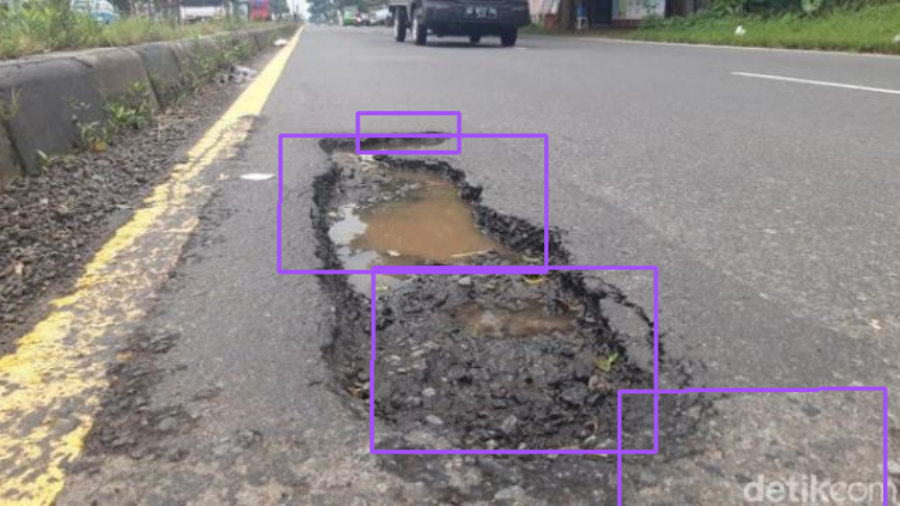

In [ ]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)
sv.cv2_to_pillow(annotated_frame)

In [ ]:
import supervision as sv
import cv2
from ultralytics import YOLO  # Pastikan Anda sudah menginstal ultralytics

# Inisialisasi model YOLO
model = YOLO('runs/obb/train3/weights/best.pt')  # Ganti dengan path model Anda jika perlu

# Path video input dan output
input_video_path = os.path.join(f"{dataset.location}/video", 'input.mp4')
output_video_path = os.path.join(f"{dataset.location}/video", 'output.mp4')

# Buka video input
cap = cv2.VideoCapture(input_video_path)

# Dapatkan informasi video input
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Inisialisasi video writer untuk output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Atau 'XVID'
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Inisialisasi annotator
oriented_box_annotator = sv.OrientedBoxAnnotator()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Deteksi objek menggunakan YOLO
    results = model(frame)
    detections = sv.Detections.from_ultralytics(results[0])

    # Anotasi frame
    annotated_frame = oriented_box_annotator.annotate(
        scene=frame,
        detections=detections
    )

    # Tulis frame ke video output
    out.write(annotated_frame)

# Tutup video capture dan writer
cap.release()
out.release()

print(f"Video output disimpan di: {output_video_path}")

Streaming output truncated to the last 5000 lines.
Speed: 1.9ms preprocess, 10.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12.2ms
Speed: 4.3ms preprocess, 12.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13.3ms
Speed: 1.9ms preprocess

Our model successfully identified the location of solar panels in the image. All solar panels have an oriented bounding box that fit the panel closely.